# Explore here

It's recommended to use this notebook for exploration purposes.

No se encontró la tabla con la evolución trimestral.
Valores limpios y cribado de la info.


/tmp/ipykernel_5531/1305377221.py:126: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Revenue'] = df['Revenue'].str.replace('$', '').str.replace('B', '').astype(float)


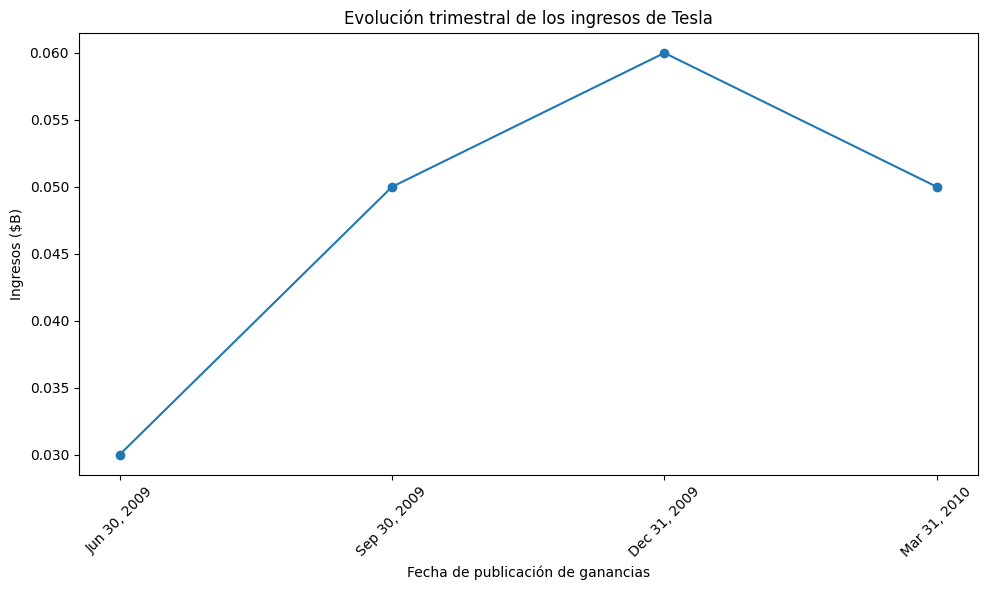

/tmp/ipykernel_5531/1305377221.py:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Earnings Release Date', y='Revenue', palette='viridis')


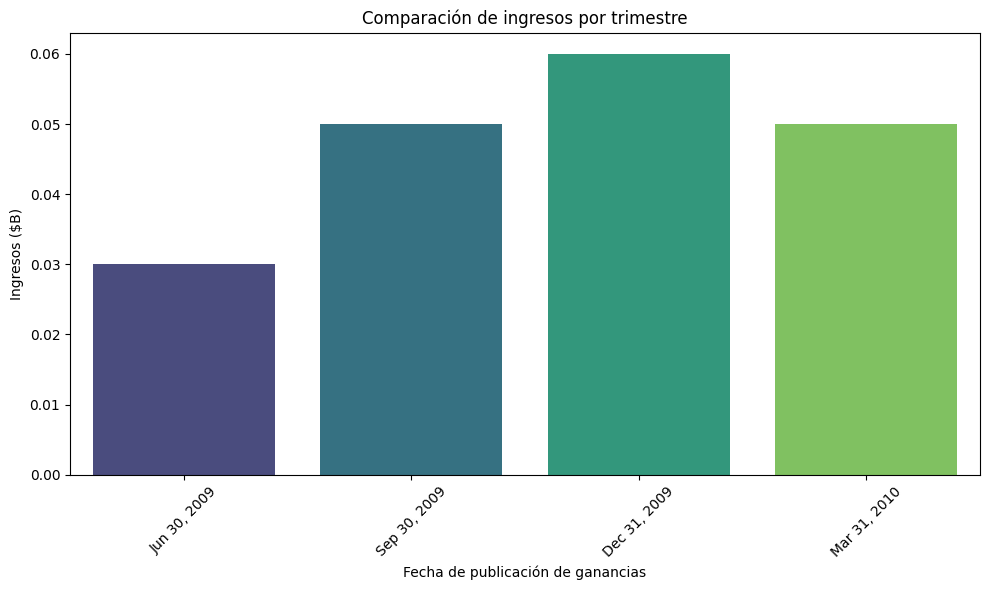

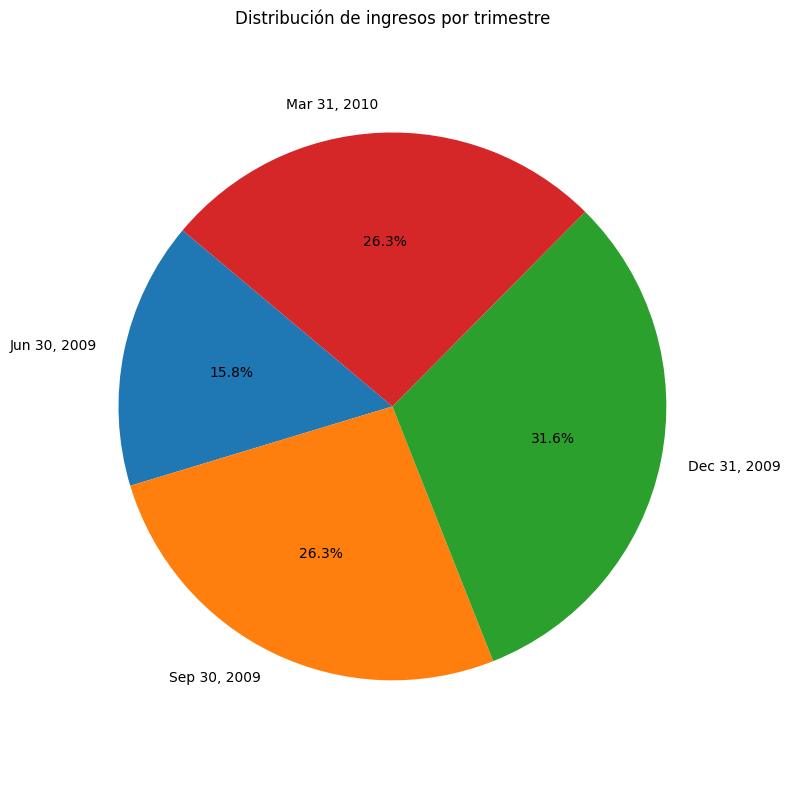

In [17]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

import requests

url="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

#Descargar el HTML de la web
response= requests.get(url)

#almacenarlo en una variable

html_text=response.text

html_text


# Analizar el HTML utilizando BeautifulSoup:

soup = BeautifulSoup(html_text, "html.parser")

# Buscar todas las tablas en el HTML:

tables = soup.find_all("table")

# Encontrar la tabla con la evolución trimestral:

quarterly_revenue_table = None
for table in tables:
    if "Earnings Release Date" in str(table):
        quarterly_revenue_table = table
        break

# Extraer los datos de la tabla en una lista de listas:

data = []
if quarterly_revenue_table:
    rows = quarterly_revenue_table.find_all("tr")
    for row in rows:
        cols = row.find_all(["th", "td"])
        cols = [col.text.strip() for col in cols]
        data.append(cols)

# Almacenar los datos en un DataFrame:

if data:
    df = pd.DataFrame(data[1:], columns=data[0])
    print(df)
else:
    print("No se encontró la tabla con la evolución trimestral.")


# Limpiar las filas para obtener los valores limpios eliminando $ y las comas:

if data:
    df = pd.DataFrame(data[1:], columns=data[0])

    # Limpiar los valores:

    df = df.apply(lambda x: x.str.replace('$', '').str.replace(',', '') if x.dtype == 'object' else x)
   
    # Eliminar filas vacías o sin información:

    df = df.dropna(how='all')
    df = df.dropna(axis=1, how='all')
    print(df)
else:
    print("Valores limpios y cribado de la info.")

    import sqlite3

#conexión con la base de datos SQLite y forzadaa crearla si no existe:

conn = sqlite3.connect('evo_trimestral_tsla.db')

# Crear la tabla en la base de datos:

if data:
    df = pd.DataFrame(data[1:], columns=data[0])

    # Limpiar los valores:

    df = df.apply(lambda x: x.str.replace('$', '').str.replace(',', '') if x.dtype == 'object' else x)
   
    # Eliminar filas vacías o sin información relevante:

    df = df.dropna(how='all')
    df = df.dropna(axis=1, how='all')
    
    # Crear la tabla:

    df.to_sql('evolucion_trimestral', conn, index=False, if_exists='replace')

    # Commit para almacenar los cambios.

    conn.commit()
    print("Datos almacenados correctamente en la base de datos.")


# Cerrar la conexión con la base de datos
conn.close()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definición del DataFrame con los datos anteriores:

data = [
    ['Earnings Release Date', 'Revenue'],
    ['Jun 30, 2009', '$0.03B'],
    ['Sep 30, 2009', '$0.05B'],
    ['Dec 31, 2009', '$0.06B'],
    ['Mar 31, 2010', '$0.05B'],
    # y así todos los datos restantes...
]

# Crear DataFrame a partir de los datos:

df = pd.DataFrame(data[1:], columns=data[0])

# Convertir la columna 'Revenue' a tipo numérico:

df['Revenue'] = df['Revenue'].str.replace('$', '').str.replace('B', '').astype(float)

# Gráfico de líneas para mostrar la evolución trimestral de los ingresos:

plt.figure(figsize=(10, 6))
plt.plot(df['Earnings Release Date'], df['Revenue'], marker='o')
plt.title('Evolución trimestral de los ingresos de Tesla')
plt.xlabel('Fecha de publicación de ganancias')
plt.ylabel('Ingresos ($B)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de barras para comparar los ingresos de diferentes trimestres:

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Earnings Release Date', y='Revenue', palette='viridis')
plt.title('Comparación de ingresos por trimestre')
plt.xlabel('Fecha de publicación de ganancias')
plt.ylabel('Ingresos ($B)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de pastel para mostrar la distribución de ingresos por trimestre:

plt.figure(figsize=(8, 8))
plt.pie(df['Revenue'], labels=df['Earnings Release Date'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de ingresos por trimestre')
plt.axis('equal')
plt.tight_layout()
plt.show()



